In [1]:
import pandas as pd
import pickle
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
import csv
import math
import os
from collections import defaultdict

In [2]:
import sys
sys.path.insert(0, '/Users/hirokihanada/code/src/github.com/hanapedia/rca_methods/topological_analysis')
from topological_analysis import Topology

/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_96686/1225807028.py:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw_networkx(dg, pos=nx.nx_pydot.graphviz_layout(dg, prog='dot'), node_size=100)


(-121.71999999999998, 2375.72, -42.48, 654.4799999999999)

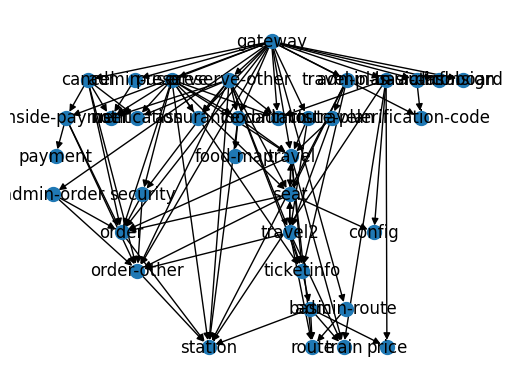

In [25]:
invos = Path("./data/train-ticket/3.pkl")
df = pd.DataFrame()
with open(invos, "rb") as f:
    df = pickle.load(f)

dg = nx.DiGraph()
    
df = df[["source", "target"]]
for _, row  in df.iterrows():
    dg.add_edge(row[0], row[1])
    


/var/folders/lb/04ff_k_17_b433_wm677wttw0000gn/T/ipykernel_96686/227106258.py:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw_networkx(dg, pos=nx.nx_pydot.graphviz_layout(dg, prog='dot'), node_size=300, edge_color="gray", labels = node_label, node_color="orange", font_family="Times New Roman")


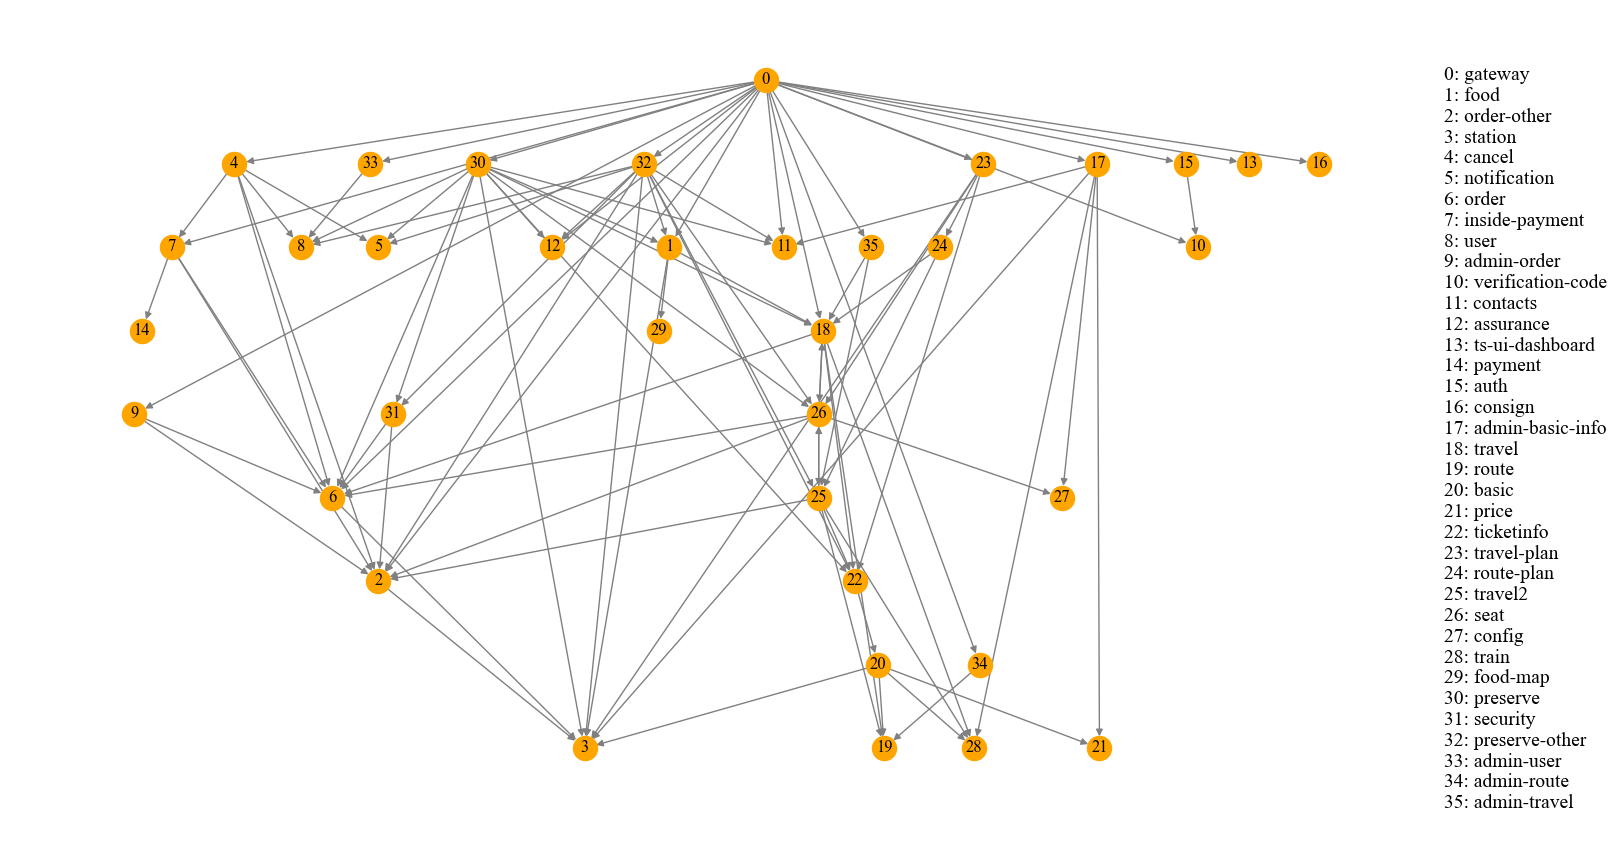

In [66]:
node_label = {node: i for i,node in enumerate(dg.nodes)}
label_string = ""
for node, i in node_label.items():
    label_string += f"{i}: {node}\n"

fontsize = 16    
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = fontsize

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
nx.draw_networkx(dg, pos=nx.nx_pydot.graphviz_layout(dg, prog='dot'), node_size=300, edge_color="gray", labels = node_label, node_color="orange", font_family="Times New Roman")
plt.axis("off")
plt.text(0.9, 0.1, label_string, fontsize=14, transform=plt.gcf().transFigure)
plt.savefig("./4_5-trainticket_topology.png", bbox_inches="tight")
plt.show()